# Exploring Unsupervised Learning Techniques

Here we will explore Unsupervised Learning, a subfield of machine learning where the goal is to model the underlying structure or distribution in the data in order to learn more about it. Unlike supervised learning, unsupervised learning does not involve labeled outcomes, making it well-suited for exploratory data analysis, clustering, dimensionality reduction, and anomaly detection, among other applications.

We will look at:
* Clustering Algorithms: Understand and implement popular clustering algorithms like k-means, hierarchical clustering, and DBSCAN.
* Dimensionality Reduction: Delve into techniques such as Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Let's load our libraries and data.

In [12]:
# first we will check if you have yellowbrick and if not install
import subprocess
import sys

# Function to check if a package is installed and install it if necessary
def check_and_install(package_name):
    try:
        # Try to import the package
        __import__(package_name)
        print(f"{package_name} is already installed.")
    except ImportError:
        # If not installed, install the package
        print(f"{package_name} is not installed. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} has been successfully installed.")

# Check and install 'yellowbrick'
check_and_install("yellowbrick")


yellowbrick is already installed.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from mpl_toolkits.mplot3d import Axes3D


In [14]:
data = pd.read_csv('9_marketing_campaign_cleaned.csv')

In [15]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2216


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,40,422,Partner,1,3,1


In [16]:
# Check for NA's with isna and sum
data.isna().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_For           0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

For more info about dataset:

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Let's have a little look at the data:

<Figure size 800x550 with 0 Axes>

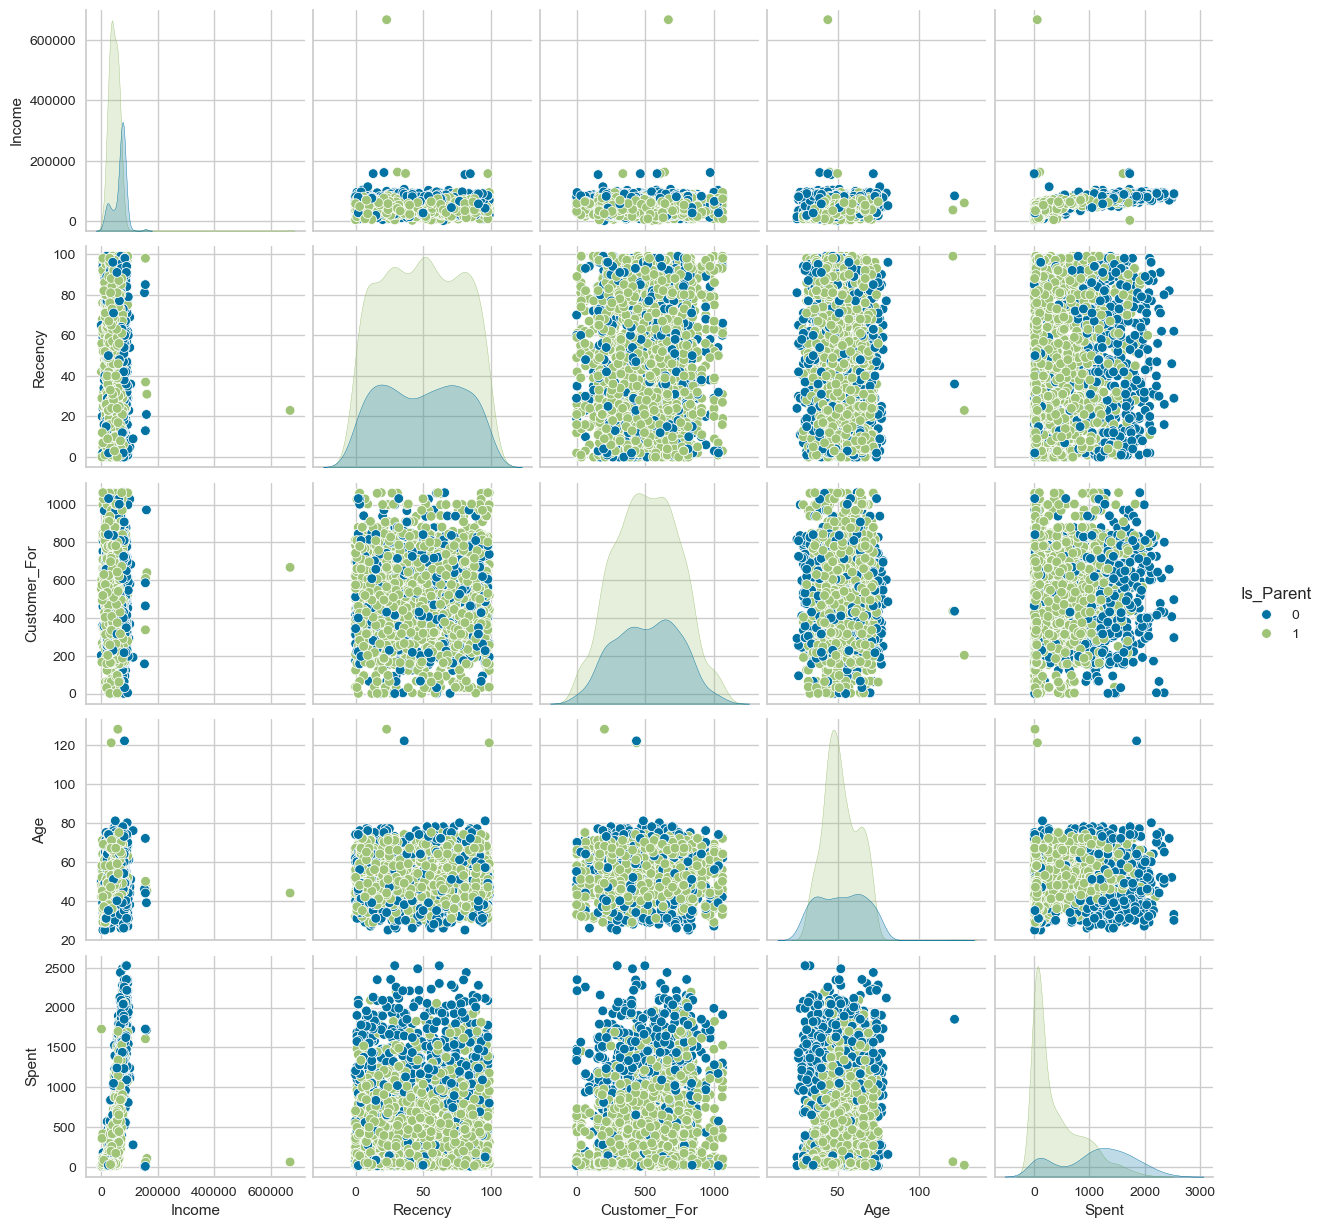

In [17]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
plt.show()

What about categorical variables? We will need to deal with these. Remember we can find our columns by looking at dtype:

```
select_dtypes(include='int64').columns.tolist()
```

In [ ]:
# use .info to check data types
data.info()

In [ ]:
# find categorical columns
categorical_columns = 

In [ ]:
# check value counts

Let's onehot encode for now, even though this isn't perfect for clustering.

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop=None)

encoded = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data.index)

# Drop the original categorical columns and concatenate the new one-hot encoded columns
data = data.drop(columns=categorical_columns).join(encoded_df)

All features are now numerical and we can run them in k means. Think about whether this makes sense in practice.

However, remember scaling is important for clustering. We will apply StandardScalar which we have seen before.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [ ]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )


In [ ]:
# check our results:
scaled_data.describe()

Outliers can be a big problem! Let's remove by removing any values greater than 3 standard deviaitons from the mean.

Filter thedata appropriately and drop where we find NA.

In [ ]:
scaled_data = scaled_data[(scaled_data > -3) & (scaled_data < 3)].dropna()

### K Means

Great our data is all ready, let's start to look at our clustering approaches. We follow a very familiar approach, only we don't need to split our data into training and test splits, we just:

* Model Initialization - Initialize the `KMeans` model with desired parameters. The number of clusters `n_clusters` (k) is a required input.
* Model Fitting - Fit the model to your data using `.fit(X)`.

https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

We can then look at the clusters designated by checking the labels `.labels_` and the centroids of the clusters `.cluster_centers_`.

In [ ]:
labels = 
labels

In [ ]:
centroids = 
centroids

Its usuall easier to understand if we plot our centeroids.

In [ ]:
centroid_df = pd.DataFrame(centroids, columns=scaled_data.columns)

# Plot centroids
plt.figure(figsize=(10, 6))
centroid_df.T.plot(kind='bar', figsize=(10, 6), legend=True)
plt.title('Centroids for Each Cluster')
plt.ylabel('Centroid Value')
plt.xlabel('Features')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

Let's try to visualise, here is some example code where we set the hue of the data based on our finding of the labels:

```
pl = sns.scatterplot(data = scaled_data,x="Spent", y="Income",hue=labels)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()
```




Here we provide a function to look at 3 features at a time.

In [ ]:
def plot_3d_clusters(data, labels, feature_names, colors=None, markers=None):
    """
    Plots a 3D scatter plot for clustering data with up to 10 different clusters.
    """
    if len(feature_names) != 3:
        raise ValueError("Three feature names must be provided for x, y, and z axes.")

    # Default color and marker arrays for up to 10 clusters
    default_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    default_markers = ['o', '^', 's', 'P', '*', 'D', 'x', '+', 'H', '1']

    # Use default colors and markers if none are provided
    if colors is None:
        colors = default_colors
    if markers is None:
        markers = default_markers

    # Check if there are enough colors and markers for the number of clusters
    unique_labels = np.unique(labels)
    if len(unique_labels) > len(colors) or len(unique_labels) > len(markers):
        raise ValueError("Not enough colors or markers for the number of clusters.")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for label, color, marker in zip(unique_labels, colors, markers):
        idx = (labels == label)
        ax.scatter(data.loc[idx, feature_names[0]], data.loc[idx, feature_names[1]], data.loc[idx, feature_names[2]], label=f'Cluster {label}', c=color, marker=marker)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.legend()
    ax.set_title('3D Cluster Plot with Distinct Colors and Markers')

    plt.show()


See if you can use the function.

#### Choosing k

Ok but what value of k should we use? We can Use an elbow visualiser to help us pick.

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

We need to specify our classifier and max k `KElbowVisualizer(alg, k=)` then we can use fit and show.



Or we can look at silhoute score. We will need a loop to calculate the score at each point in time and add to a list. Try setting the k means init to 'k-means++'.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# List to store the silhouette scores
silhouette_scores = []

# Range of k values to try
k_range = range(2, 11)  # Usually, a minimum of 2 clusters is considered
# Compute silhouette scores for different k values
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)  # Exclude the 'Cluster_Labels' column for fitting
    labels = kmeans.labels_
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)





In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Choosing Optimal k using Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal k (where silhouette score is maximum)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal K: {optimal_k} with score {max(silhouette_scores)}")

We can also look at the clusters themselves with the slihoute visualiser:

https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

## Hierarchical Methods:
Let's examine how agglomerative and divisive techniques build the dendrogram in hierarchical clustering.

We need to set the linkage type we will use by creating a linkage object, here we use ward.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

```
Z = linkage(hc_data, method='ward')
```

In [ ]:
Z

With our linkage type we can create a dendrogram.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [ ]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

Next we can fit our all an `AgglomerativeClustering` model. We follow the same steps: initialise, fit, predict (on our case just check labels with `.labels_`)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

To initialise we need to set `n_clusters`, `metric` for which we cna use 'euclidean' and `linkage` for which again we can use'ward'

Let's plot our clusters:

In [ ]:
labels = 
pl = sns.scatterplot(data = scaled_data,x="Spent", y="Income",hue=labels)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Again we can explore values for k using KElbowVisualiser and Silhoute score:

In [ ]:
# List to store the silhouette scores
silhouette_scores = []

# Range of k values to try
k_range = range(2, 11)  # Usually, a minimum of 2 clusters is considered

# Compute silhouette scores for different k values


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Choosing Optimal k using Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal k (where silhouette score is maximum)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k, max(silhouette_scores)

### DBSCAN
Finally, let's take a look at DBSCAN.

We initialise `DBSCAN` with `eps` and `min_samples`

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

DBSCAN will identify the number of clusters iteself, let's take a look at what it found:

```
u, c = np.unique(X, return_counts=True)

cluster_summary_df = pd.DataFrame({
    'Cluster_ID': u,
    'Number_of_Points': c
})

```

In [ ]:
dbscan_labels = 

# Count the number of unique clusters and noise points
unique_clusters, counts = np.unique(dbscan_labels, return_counts=True)

# Number of unique clusters (excluding noise)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)


# Create a DataFrame to display the cluster IDs and their corresponding counts
cluster_summary_df = pd.DataFrame({
    'Cluster_ID': unique_clusters,
    'Number_of_Points': counts
})

# Highlight the noise points (-1)
cluster_summary_df['Type'] = ['Noise' if id == -1 else 'Cluster' for id in unique_clusters]

cluster_summary_df

Let's see our plot again:

In [ ]:
pl = sns.scatterplot(data = db_data,x=db_data["Spent"], y=db_data["Income"],hue=dbscan_labels)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Maybe it would be helpful to work with less data, try again with a subset of the features:

In [ ]:
db_data_small = scaled_data[["Spent", "Income", "Age"]].copy()
dbscan_small = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels_small = dbscan_small.fit_predict(db_data_small)


In [ ]:
# Count the number of unique clusters and noise points
unique_clusters, counts = np.unique(dbscan_labels_small, return_counts=True)

# Number of unique clusters (excluding noise)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)


# Create a DataFrame to display the cluster IDs and their corresponding counts
cluster_summary_df = pd.DataFrame({
    'Cluster_ID': unique_clusters,
    'Number_of_Points': counts
})

# Highlight the noise points (-1)
cluster_summary_df['Type'] = ['Noise' if id == -1 else 'Cluster' for id in unique_clusters]

cluster_summary_df


### Exercise

We have seen how to apply different unsupervised techniques to clustering. But we have not produced very useful output and there are a number of decisions that may result in not very effective clustering. Try to imporve the clustering:
* Look at the features, in particular their correlations, and check we are not adding too much importance to one type of feature by including it multiple times.
* Think about the data types of features, have we dealt with these well? What other approaches could we take?
* Think about the difference between centroids and medoids? Which is more useful? can you produce both?

Make use of additional visualisation functionality from yellowbricks:

https://www.scikit-yb.org/en/latest/api/cluster/icdm.html
https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

Try to produce the most useful clustering of the customer data for a sales or marketing team. Understand the difference between the clusters.
* One you have found the "best" clustering give each cluster a name and describe it's proporties.